# 클러스터링 예

## 고객세분화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA 

## 데이터 읽기

In [3]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv
df = pd.read_csv('customer.csv')
print(df.shape)
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  10134      0 --:--:-- --:--:-- --:--:-- 10134
(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 원 핫 인코딩
- 성별을 One Hot Encoding 

In [5]:
df = pd.get_dummies(df, columns = ['Gender'])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


## 스케일링

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[continuous] = scaler.fit_transform(df[continuous])
df = df.drop("CustomerID", axis=1)
df[:5]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


In [7]:
df_raw = df.copy() # 사본 저장

# 최적의 클러스터 수 찾기

- 덴드로그램
- 실루엣 지수 보기
- mass(inertia)의 변화 보기

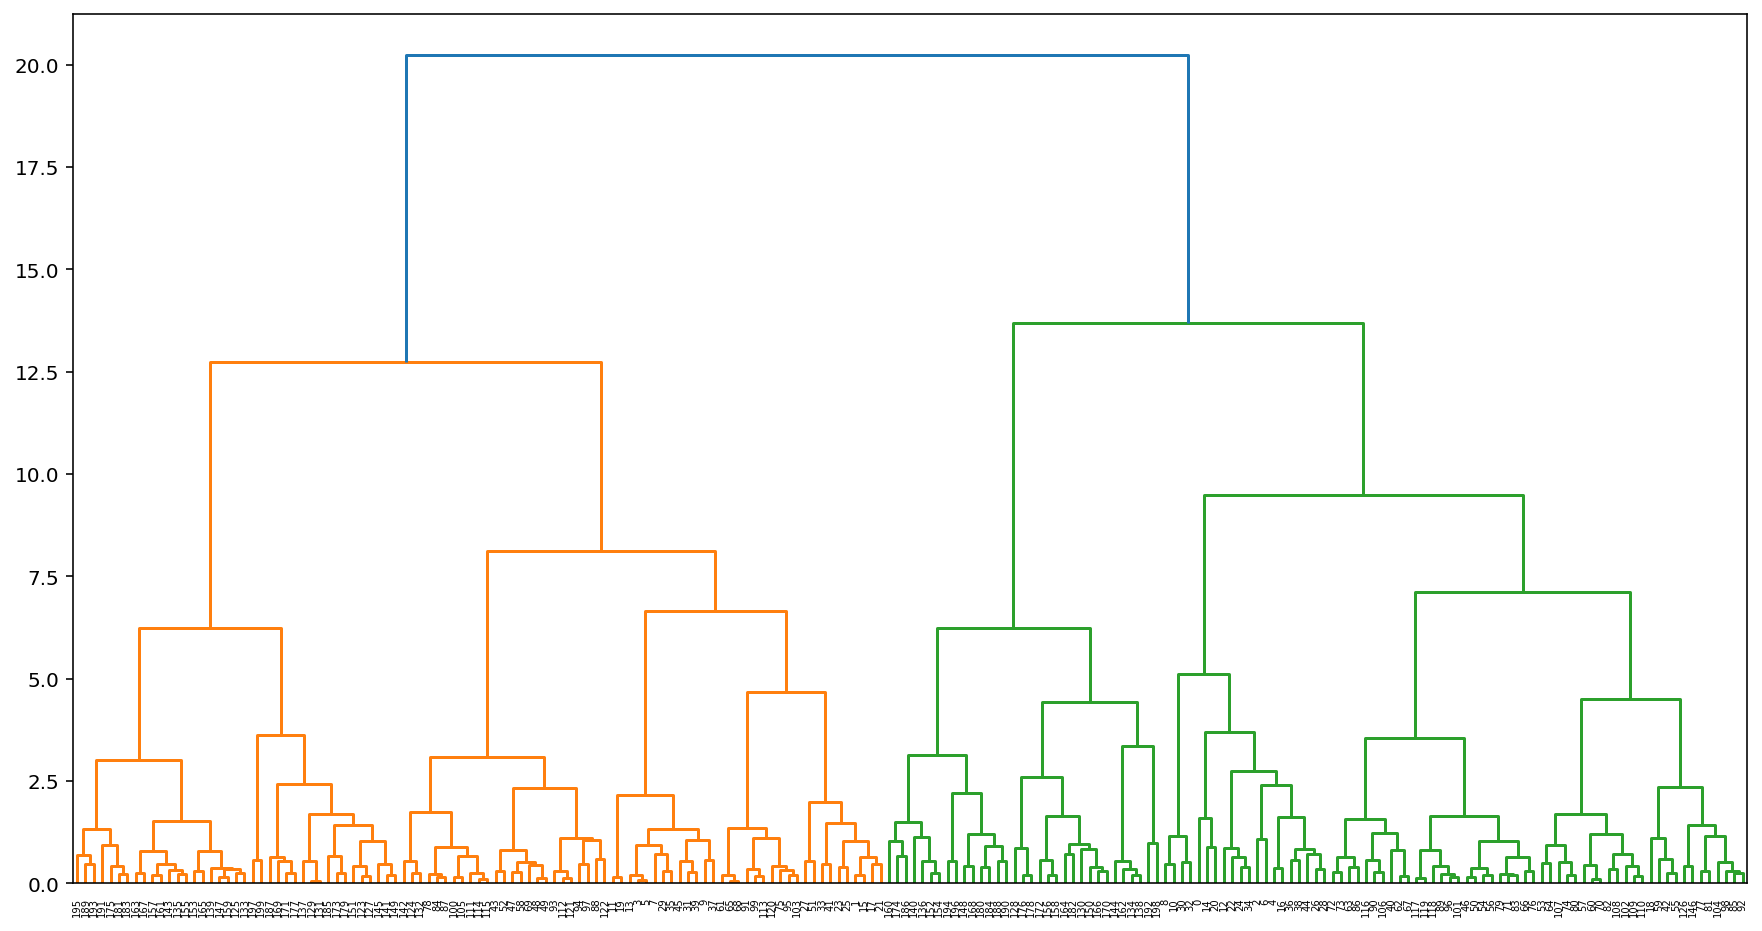

In [8]:
plt.figure(figsize=(15, 8))
link_dist = linkage(df, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=df.index.tolist())
plt.show()

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

results = []
for c in range(2,21):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  results.append([c,silhouette_avg])

pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

,n_clusters,silhouette_score
0,2,0.282065
1,3,0.287876
2,4,0.319470
3,5,0.307407
4,6,0.317889
5,7,0.320554
6,8,0.330769
7,9,0.343033
8,10,0.359343
9,11,0.365866


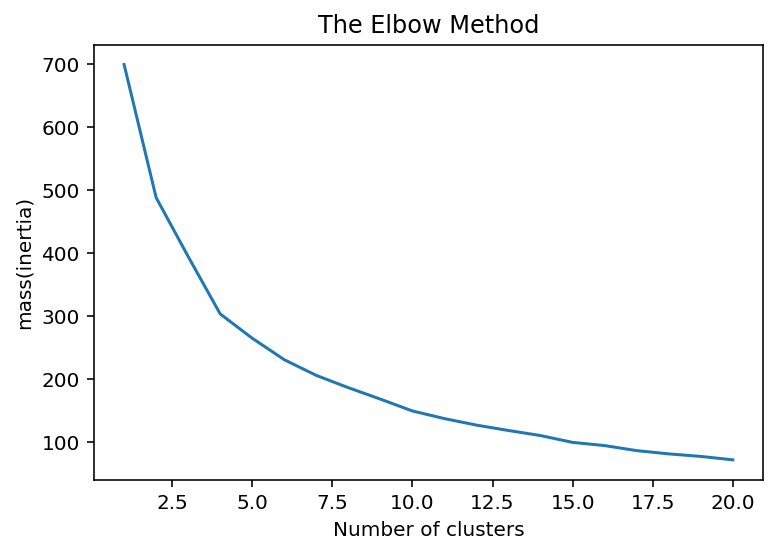

In [10]:
mass = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 21), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass(inertia)')
plt.show()

# 산포도 그리기

## PCA(2) 축에서 그리기

In [16]:
kmeans = KMeans(n_clusters = 6)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 0,
       2, 3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 5, 0, 5, 4, 5, 4, 5, 4, 5,
       0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5], dtype=int32)

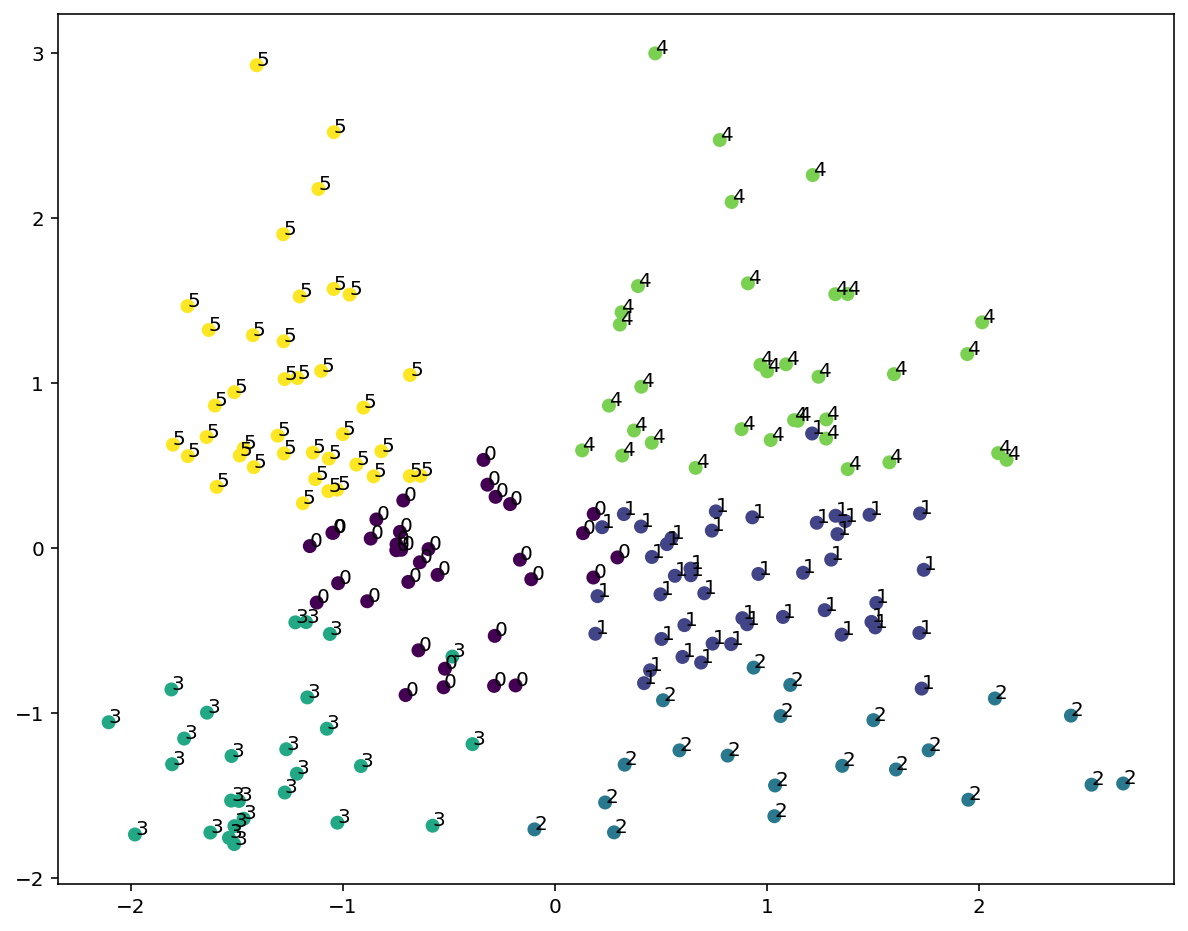

In [17]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(df)
plt.figure(figsize=(10,8))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y_kmeans)

for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n], y_kmeans[n])

## 임의의 특성 공간에서 그리기

- Age, Annual Income (k$) 특성 축에서 그리기

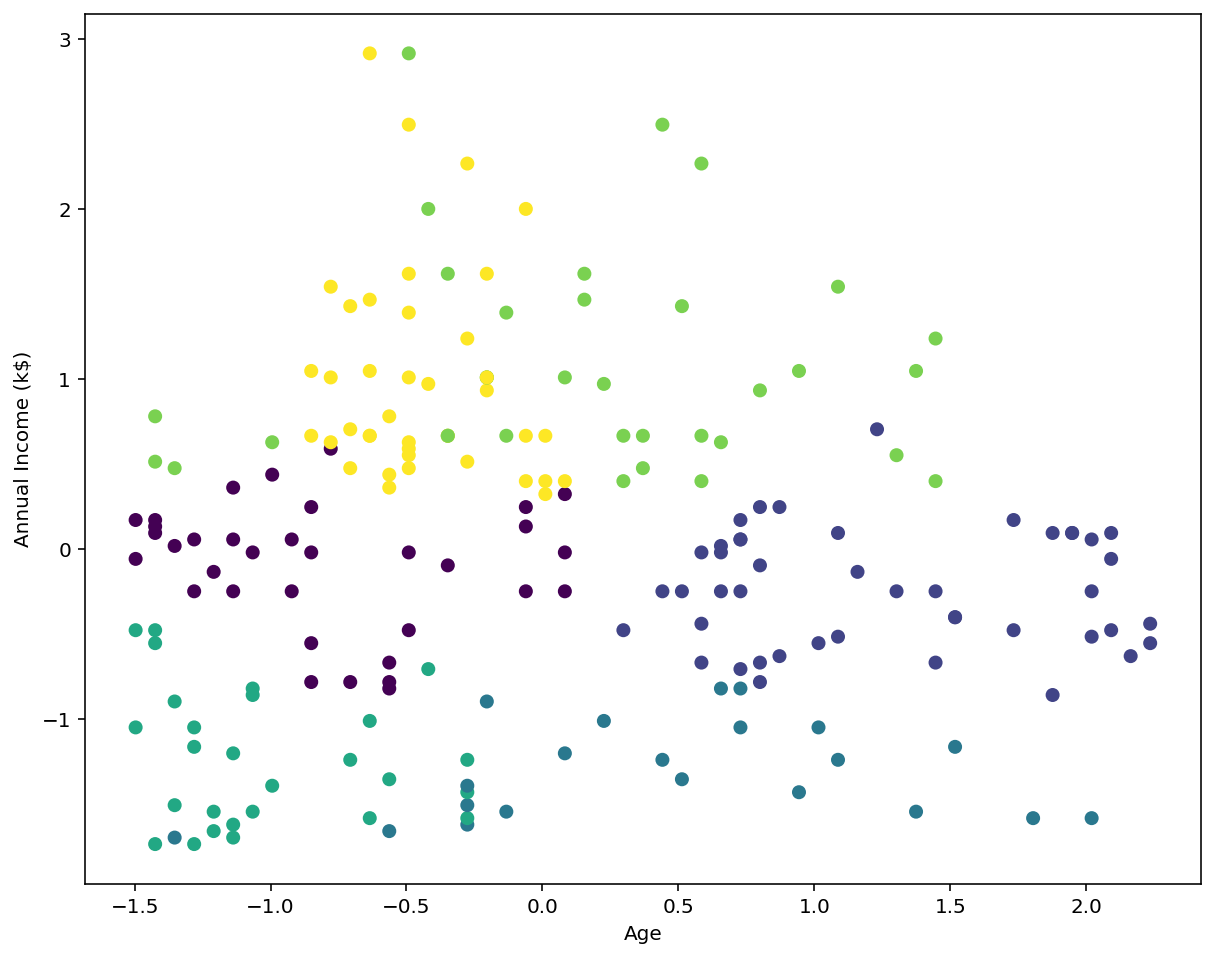

In [21]:
plt.figure(figsize=(10, 8))
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.scatter(df['Age'], df['Annual Income (k$)'], c=y_kmeans) 